# House Price Prediction

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Setting up matplotlib
%matplotlib inline
plt.rc("figure", dpi=100)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [2]:
file_path = "./Bangalore_house_prices/Bangalore_House_Data.csv"
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [3]:
print("Dataframe Shape:", df.shape)
df.head()

Dataframe Shape: (13320, 9)


area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

## Data Cleaning

In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### Searching for duplicated values and removing them

In [5]:
df[df.duplicated()]

area_type   availability          location       size  \
971    Super built-up  Area  Ready To Move      Haralur Road      3 BHK   
1115   Super built-up  Area  Ready To Move      Haralur Road      2 BHK   
1143   Super built-up  Area  Ready To Move       Vittasandra      2 BHK   
1290   Super built-up  Area  Ready To Move      Haralur Road      2 BHK   
1394   Super built-up  Area  Ready To Move      Haralur Road      2 BHK   
...                     ...            ...               ...        ...   
13285  Super built-up  Area  Ready To Move      VHBCS Layout      2 BHK   
13299  Super built-up  Area         18-Dec        Whitefield      4 BHK   
13311            Plot  Area  Ready To Move  Ramamurthy Nagar  7 Bedroom   
13313  Super built-up  Area  Ready To Move       Uttarahalli      3 BHK   
13319  Super built-up  Area  Ready To Move      Doddathoguru      1 BHK   

       society   total_sqft  bath  balcony  price  
971    NRowse          1464   3.0      2.0   56.0  
1115       NaN         1027   2.0      2.0   44.0  
1143   Prlla C         1246   2.0      1.0   64.5  
1290       NaN         1194   2.0      2.0   47.0  
1394       NaN         1027   2.0      2.0   44.0  
...        ...          ...   ...      ...    ...  
13285  OlarkLa         1353   2.0      2.0  110.0  
13299  Prtates  2830 - 2882   5.0      0.0  154.5  
13311      NaN         1500   9.0      2.0  250.0  
13313  Aklia R         1345   2.0      1.0   57.0  
13319      NaN          550   1.0      1.0   17.0  

[529 rows x 9 columns]

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
# Since "society" column has a very large number of missing values, we drop it
df.drop(["society"], axis=1, inplace=True)

In [8]:
df.shape

(12791, 8)

### Location Encoding

In [9]:
df.location = df.location.str.upper()
# df.location.to_csv("location.csv", header=False, index=False)

LL = pd.read_csv("LL.csv")
df = df.join(LL.set_index("location"), on="location")
# df.drop("location", axis=1, inplace=True)

---

Now we are gonna add a bhk column

In [10]:
def to_int(x):
    try:
        return int(x.split(' ')[0])
    except:
        return np.nan

df['bhk'] = df['size'].apply(lambda x: to_int(x))
df.drop("size", axis=1, inplace=True)

---

Correcting the "total_sqft" column

In [11]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df[~df['total_sqft'].apply(is_float)].head(10)

area_type   availability            location      total_sqft  \
30   Super built-up  Area         19-Dec           YELAHANKA     2100 - 2850   
56         Built-up  Area         20-Feb         DEVANAHALLI     3010 - 3410   
81         Built-up  Area         18-Oct         HENNUR ROAD     2957 - 3450   
122  Super built-up  Area         18-Mar              HEBBAL     3067 - 8156   
137  Super built-up  Area         19-Mar  8TH PHASE JP NAGAR     1042 - 1105   
165  Super built-up  Area         18-Dec            SARJAPUR     1145 - 1340   
188  Super built-up  Area  Ready To Move            KR PURAM     1015 - 1540   
224  Super built-up  Area         19-Dec         DEVANAHALLI     1520 - 1740   
410  Super built-up  Area  Ready To Move             KENGERI  34.46Sq. Meter   
549  Super built-up  Area         18-Sep         HENNUR ROAD     1195 - 1440   

     bath  balcony    price   latitude  longitude  bhk  
30    4.0      0.0  186.000  13.100698  77.596345  4.0  
56    NaN      NaN  192.000  13.248350  77.713438  4.0  
81    NaN      NaN  224.500  13.126725  77.667383  4.0  
122   4.0      0.0  477.000  13.043450  77.590516  4.0  
137   2.0      0.0   54.005  12.916500  77.592246  2.0  
165   2.0      0.0   43.490  12.920441  77.665328  2.0  
188   2.0      0.0   56.800  13.017439  77.696021  2.0  
224   NaN      NaN   74.820  13.248350  77.713438  3.0  
410   1.0      0.0   18.500  12.928479  77.486718  1.0  
549   2.0      0.0   63.770  13.126725  77.667383  2.0

Above data shows that total sqft can be a range (e.g. 2100-2850). For such cases we can Just take average of Min & max value in the range. There are other cases where values are in sqm which can be converted to sqft using Unit conversion.

In [12]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return np.nan

df.total_sqft = df.total_sqft.apply(convert_sqft_to_num)

In [13]:
df.isnull().sum()

area_type         0
availability      0
location          1
total_sqft       46
bath             73
balcony         605
price             0
latitude        617
longitude       617
bhk              16
dtype: int64

### Train Test Split

Train test split is done before imputation to avoid train-test contamination.

In [14]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.75, random_state=0)

In [15]:
print(df_train.shape, df_test.shape)

(9593, 10) (3198, 10)


### Handling Missing Values

In [16]:
df_train.isnull().sum()

area_type         0
availability      0
location          1
total_sqft       38
bath             54
balcony         452
price             0
latitude        465
longitude       465
bhk              11
dtype: int64

In [17]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer(strategy="median")
cols = df_train.select_dtypes(exclude=['object']).columns
imputed_df_train = pd.DataFrame(my_imputer.fit_transform(df_train[cols]))
imputed_df_test = pd.DataFrame(my_imputer.transform(df_test[cols]))

# Imputation removed column names; putting them back
imputed_df_train.columns = cols
imputed_df_test.columns = cols

In [18]:
df_train[cols] = imputed_df_train.values
df_test[cols] = imputed_df_test.values

In [19]:
# Removing any other incomplete rows
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [20]:
# Rounding categorical variables from float64 to int64
df_train.bath = df_train.bath.apply(lambda x: round(x))
df_train.balcony = df_train.balcony.apply(lambda x: round(x))
df_train.bhk = df_train.bhk.apply(lambda x: round(x))

## EDA and Feature Engineering

Add new feature called price per square feet

In [21]:
df_train['price_per_sqft'] = df_train.price * 100000 / df_train.total_sqft
df_test['price_per_sqft'] = df_test.price * 100000 / df_test.total_sqft
df_train.head()

area_type   availability         location  total_sqft  bath  \
10338            Plot  Area  Ready To Move   BANJARA LAYOUT       610.0     3   
11977  Super built-up  Area  Ready To Move      TUMKUR ROAD       992.0     2   
10832  Super built-up  Area  Ready To Move        MEDAHALLI       760.0     2   
683    Super built-up  Area  Ready To Move  AMBEDKAR COLONY      1875.0     3   
12240  Super built-up  Area  Ready To Move    ASHWATH NAGAR      1625.0     3   

       balcony  price   latitude  longitude  bhk  price_per_sqft  
10338        1   60.0  13.011885  77.544139    3     9836.065574  
11977        1   70.0  13.022660  77.550170    2     7056.451613  
10832        2   38.5  13.027845  77.720608    2     5065.789474  
683          2  165.0  24.473665  75.137755    3     8800.000000  
12240        2   95.0  12.887209  77.680655    3     5846.153846

Examine locations which is a categorical variable. We need to apply the dimensionality reduction technique here to reduce the number of locations.

In [22]:
df_train.location = df_train.location.apply(lambda x: x.strip())
location_stats = df_train.location.value_counts(ascending=False)

df_test.location = df_test.location.apply(lambda x: x.strip())
location_stats_test = df_test.location.value_counts(ascending=False)

location_stats

WHITEFIELD          390
SARJAPUR  ROAD      285
ELECTRONIC CITY     214
KANAKPURA ROAD      190
THANISANDRA         168
                   ... 
GANDHI NAGAR          1
SRIGANDADA KAVAL      1
BASAVESWARNAGAR       1
KAMAKIYA              1
BILLAPURA             1
Name: location, Length: 1146, dtype: int64

In [23]:
print(
    location_stats.values.sum(),
    len(location_stats),
    len(location_stats[location_stats>10]),
    len(location_stats[location_stats<=10]),
    sep="\n"
)

9592
1146
191
955


### Dimensionality Reductions

Any location having less than 10 data pints should be tagged as "OTHER" location. This way number of categories can be reduced by huge amount.

In [24]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10_test = location_stats_test[location_stats_test <= 10]

location_stats_less_than_10

DOMMASANDRA               10
ITPL                      10
KODIGEHAALI               10
NEELADRI NAGAR            10
GOLLARAPALYA HOSAHALLI    10
                          ..
GANDHI NAGAR               1
SRIGANDADA KAVAL           1
BASAVESWARNAGAR            1
KAMAKIYA                   1
BILLAPURA                  1
Name: location, Length: 955, dtype: int64

In [25]:
df_train.location.nunique()

1146

In [26]:
df_train.location = df_train.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
df_test.location = df_test.location.apply(lambda x: 'other' if x in location_stats_less_than_10_test else x)

df_train.location.nunique()

192

In [27]:
df_train.tail()

area_type   availability        location  total_sqft  bath  \
4934   Super built-up  Area         17-Dec           other      1220.0     2   
3302             Plot  Area  Ready To Move           other      2779.0     3   
10166  Super built-up  Area         19-Dec  HORAMAVU AGARA      1623.0     3   
11180        Built-up  Area         18-Feb    SONNENAHALLI      1011.0     2   
2756           Carpet  Area         18-Dec          HEBBAL       823.0     2   

       balcony   price   latitude  longitude  bhk  price_per_sqft  
4934         2   48.79  12.946662  77.530090    2     3999.180328  
3302         1  317.00  12.887382  77.568867    3    11406.980928  
10166        1   89.00  13.019413  77.655751    3     5483.672212  
11180        1   59.00  12.942001  77.483369    2     5835.806133  
2756         1   50.63  13.043450  77.590516    2     6151.883354

### Outlier Removal Using Business Logic

As a data scientist when you have a conversation with your business manager (expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We Will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [28]:
df_train[df_train.total_sqft / df_train.bhk < 300].head()

area_type   availability     location  total_sqft  bath  balcony  \
10338      Plot  Area  Ready To Move        other       610.0     3        1   
11163      Plot  Area  Ready To Move  MAGADI ROAD      1200.0     4        1   
3039   Built-up  Area  Ready To Move        other       600.0     7        3   
7455       Plot  Area         18-May   GIRI NAGAR      1120.0     4        2   
3805       Plot  Area  Ready To Move   SEEGEHALLI      1200.0     5        3   

       price   latitude  longitude  bhk  price_per_sqft  
10338   60.0  13.011885  77.544139    3     9836.065574  
11163  130.0  12.961914  77.341944    5    10833.333333  
3039    89.0  12.895643  77.626510    7    14833.333333  
7455   175.0  12.937569  77.545788    4    15625.000000  
3805   120.0  13.016432  77.716989    5    10000.000000

In the above data points we have 6 bhk apartments with 1020 sqft. Another one is 8 bhk and the total sqft is 600. These are clear data errors that can be removed safely.

In [29]:
df_train.shape

(9592, 11)

In [30]:
df_train = df_train[~(df_train.total_sqft / df_train.bhk < 300)]
df_test = df_test[~(df_test.total_sqft / df_test.bhk < 300)]

In [31]:
df_train.shape

(9034, 11)

### Outlier Removal Using Standard Deviation and Mean

In [32]:
df_train.price_per_sqft.describe()

count      9034.000000
mean       6386.605254
std        4349.061940
min         267.829813
25%        4250.050120
50%        5348.199023
75%        6969.379363
max      176470.588235
Name: price_per_sqft, dtype: float64

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

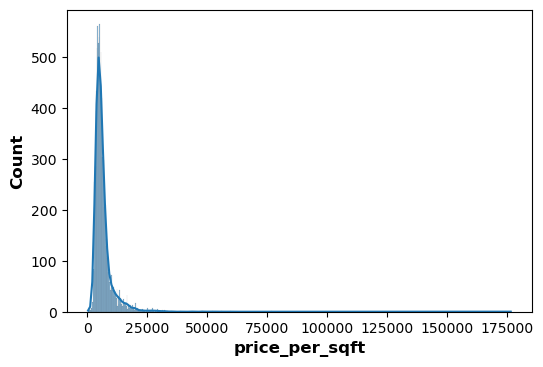

In [33]:
sns.histplot(df_train.price_per_sqft, kde=True)

---

The below graph shows that "price_per_sqft" varies by "location"

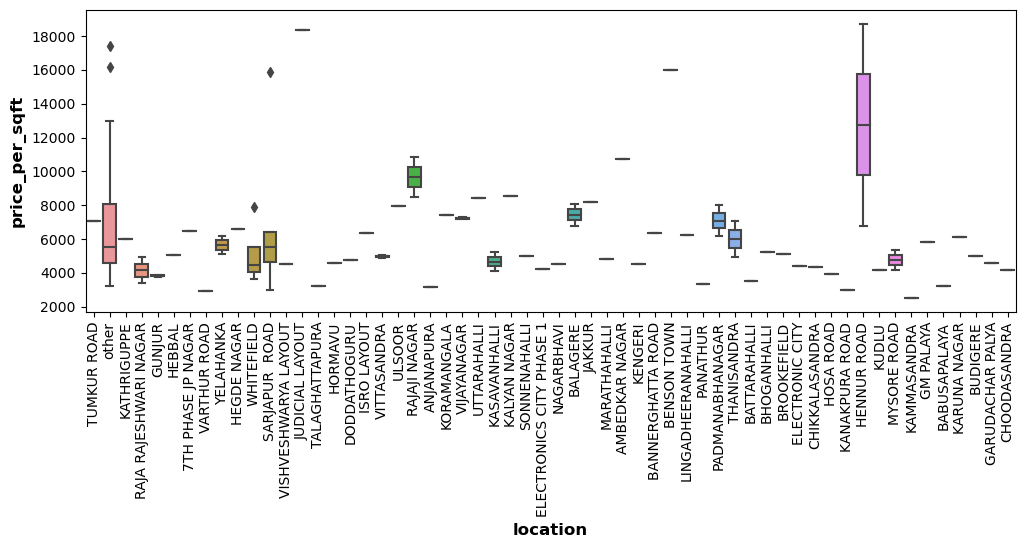

In [34]:
plt.figure(figsize=(12, 4))
sns.boxplot(
    x=df_train.location.head(100),
    y=df_train.price_per_sqft
).tick_params(axis='x', rotation=90)

Here we see that min price per sqft is ₹267/Sqft whereas max is ₹76923/Sqft, this shows a wide variation in property prices. We should remove outliers per location using mean and standard deviation.

In [35]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df_train = remove_pps_outliers(df_train)
df_test = remove_pps_outliers(df_test)

In [36]:
df_train.price_per_sqft.describe()

count     7489.000000
mean      5699.142567
std       2223.745077
min        912.151821
25%       4284.323272
50%       5217.391304
75%       6482.281763
max      21875.000000
Name: price_per_sqft, dtype: float64

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

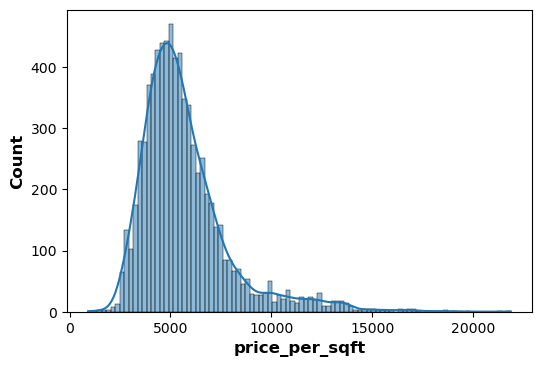

In [37]:
sns.histplot(df_train.price_per_sqft, kde=True)

---

Let's check if for a given location how does each "bhk" property prices look like.

In [38]:
def scatterchart(df, location):
    df_loc = df[(df.location == location)]
    sns.scatterplot(x=df_loc.total_sqft, y=df_loc.price, hue=df_loc.bhk).set(title=location)

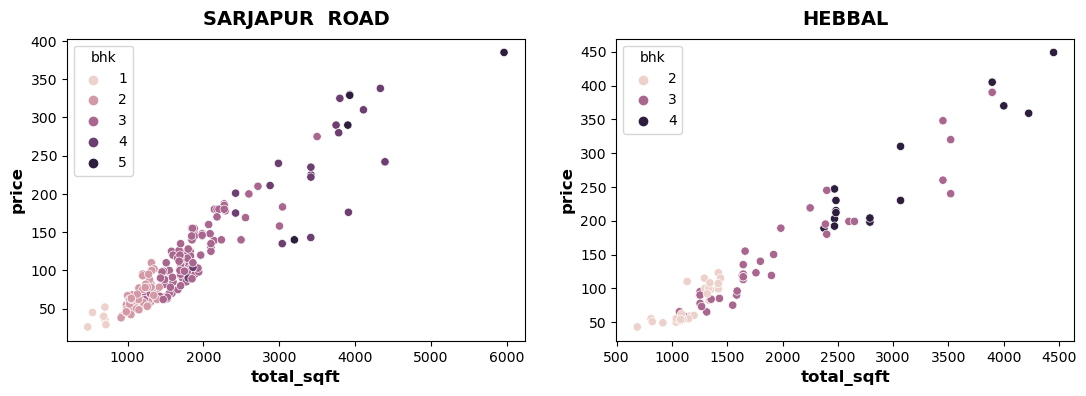

In [39]:
fig = plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
scatterchart(df_train, "SARJAPUR  ROAD")
plt.subplot(1, 2, 2)
scatterchart(df_train, "HEBBAL")

We should also remove properties where for the same location, the price of a 3 bedroom apartment is less than a 2 bedroom apartment (with the same square ft. area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

```python
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```

Now we can remove those 2 bhk apartments whose price_per_sqft is less than the mean price_per_sqft of 1 bhk apartment

In [40]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats = {}

        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }

        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(
                    exclude_indices,
                    bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values
                )

    return df.drop(exclude_indices, axis='index')

df_train = remove_bhk_outliers(df_train)
df_test = remove_bhk_outliers(df_test)

In [41]:
df_train.shape

(5186, 11)

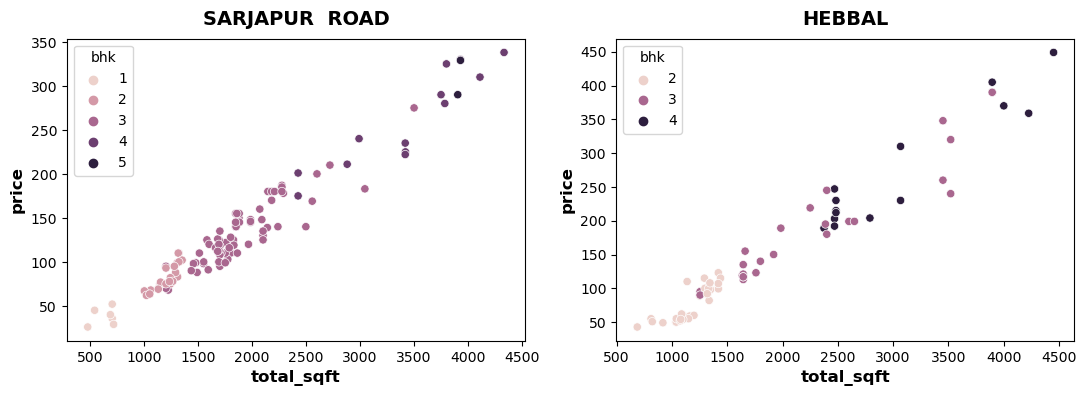

In [42]:
fig = plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
scatterchart(df_train, "SARJAPUR  ROAD")
plt.subplot(1, 2, 2)
scatterchart(df_train, "HEBBAL")

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

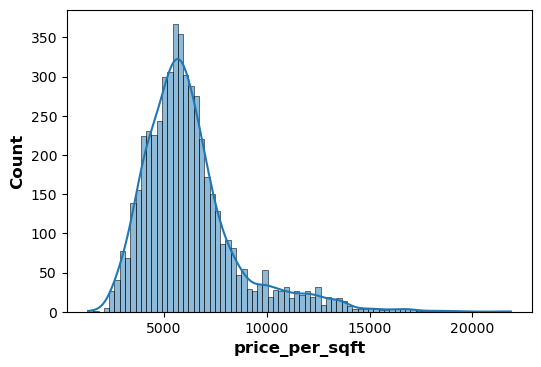

In [43]:
sns.histplot(df_train.price_per_sqft, kde=True)

---

Outlier removal using bathrooms feature.

In [44]:
df_train.bath.unique()

array([ 3,  2,  4,  8,  5,  1,  6,  7, 13, 12,  9, 16], dtype=int64)

<AxesSubplot:xlabel='bath', ylabel='Count'>

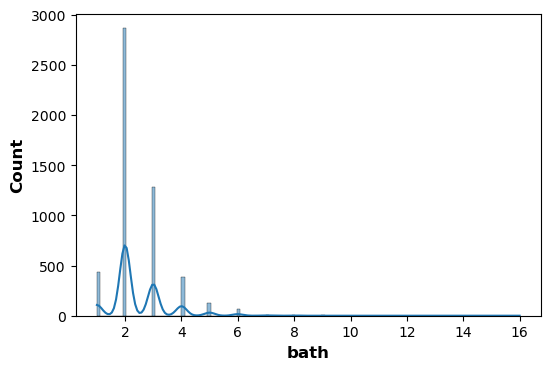

In [45]:
sns.histplot(df_train.bath, kde=True)

In [46]:
df_train[df_train.bath > 10]

area_type   availability location  total_sqft  bath  balcony  \
5462  Super built-up  Area  Ready To Move    other      5425.0    13        0   
5751  Super built-up  Area  Ready To Move    other      6000.0    12        2   
6425  Super built-up  Area  Ready To Move    other     10000.0    16        2   
7443  Super built-up  Area  Ready To Move    other      4000.0    12        2   

      price   latitude  longitude  bhk  price_per_sqft  
5462  275.0  12.965570  77.606250   13     5069.124424  
5751  150.0  12.966718  77.763046   11     2500.000000  
6425  550.0  13.026060  77.542947   16     5500.000000  
7443  160.0  12.839953  77.630803   10     4000.000000

It is unusual to have 2 more bathrooms than number of bedrooms in a home. Again the business manager informed that if you have a 4 bedroom home and even if you have a bathroom in all 4 rooms plus one guest bathroom, you will have a total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed.

In [47]:
df_train = df_train[df_train.bath <= df_train.bhk + 1]
df_test = df_test[df_test.bath <= df_test.bhk + 1]

### Exploring Data

In [48]:
df_train_num = df_train.select_dtypes(exclude=["object"])
df_train_num.head()

total_sqft  bath  balcony  price  latitude  longitude  bhk  price_per_sqft
0      1875.0     3        1  167.0   12.9165  77.592246    3     8906.666667
2      1590.0     3        3  131.0   12.9165  77.592246    3     8238.993711
4      1566.0     2        0  180.0   12.9165  77.592246    2    11494.252874
6      2065.0     4        1  210.0   12.9165  77.592246    3    10169.491525
7      1394.0     2        2   85.0   12.9165  77.592246    2     6097.560976

In [49]:
df_test_num = df_test.select_dtypes(exclude=["object"])
df_test_num.head()

total_sqft  bath  balcony   price   latitude  longitude  bhk  \
0      1850.0   3.0      1.0  150.00  12.918551  77.585631  3.0   
1      1040.0   2.0      1.0   75.00  12.918551  77.585631  2.0   
2      1000.0   2.0      1.0   70.65  12.918551  77.585631  2.0   
3      1790.0   3.0      3.0  120.00  12.918551  77.585631  3.0   
4      1850.0   3.0      2.0  155.00  12.918551  77.585631  3.0   

   price_per_sqft  
0     8108.108108  
1     7211.538462  
2     7065.000000  
3     6703.910615  
4     8378.378378

array([[<AxesSubplot:title={'center':'total_sqft'}>,
        <AxesSubplot:title={'center':'bath'}>,
        <AxesSubplot:title={'center':'balcony'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'bhk'}>,
        <AxesSubplot:title={'center':'price_per_sqft'}>, <AxesSubplot:>]],
      dtype=object)

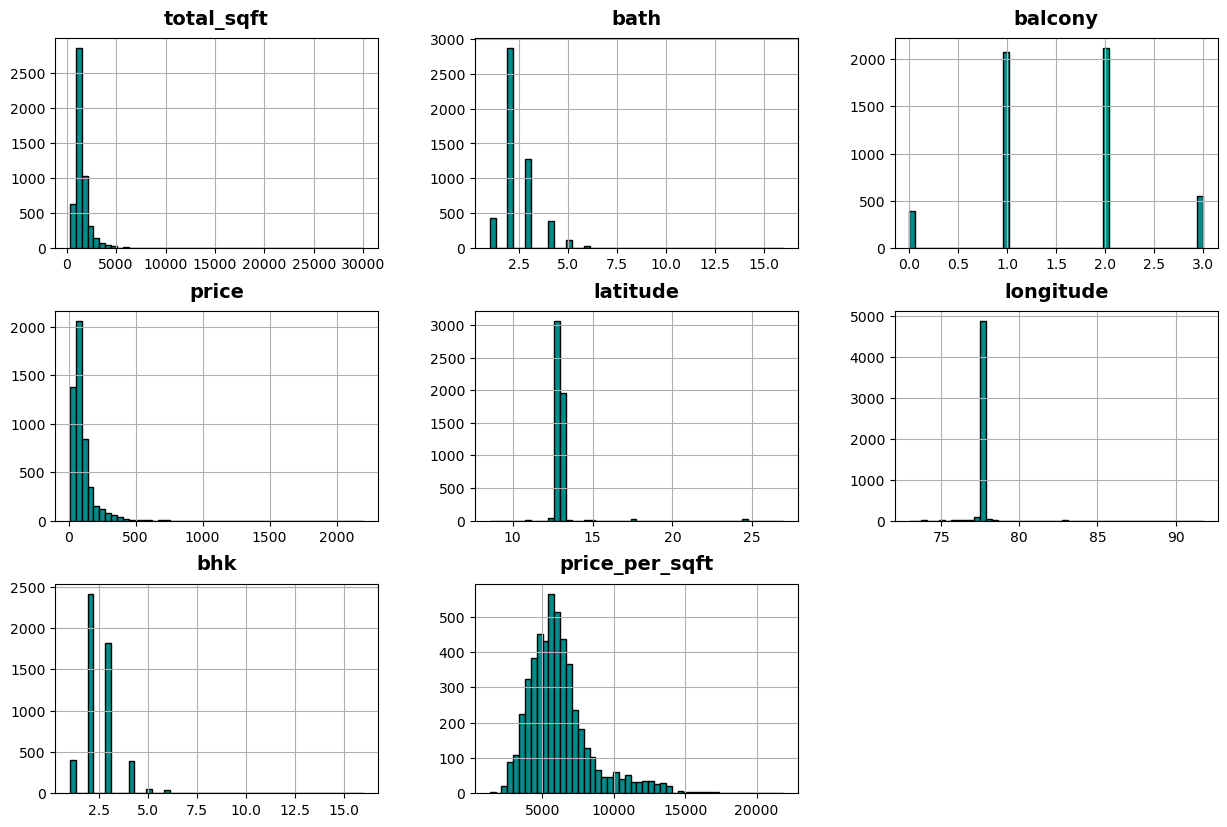

In [50]:
df_train_num.hist(figsize=(15, 10), bins=50, color="darkcyan", edgecolor="black")

array([[<AxesSubplot:title={'center':'total_sqft'}>,
        <AxesSubplot:title={'center':'bath'}>,
        <AxesSubplot:title={'center':'balcony'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'bhk'}>,
        <AxesSubplot:title={'center':'price_per_sqft'}>, <AxesSubplot:>]],
      dtype=object)

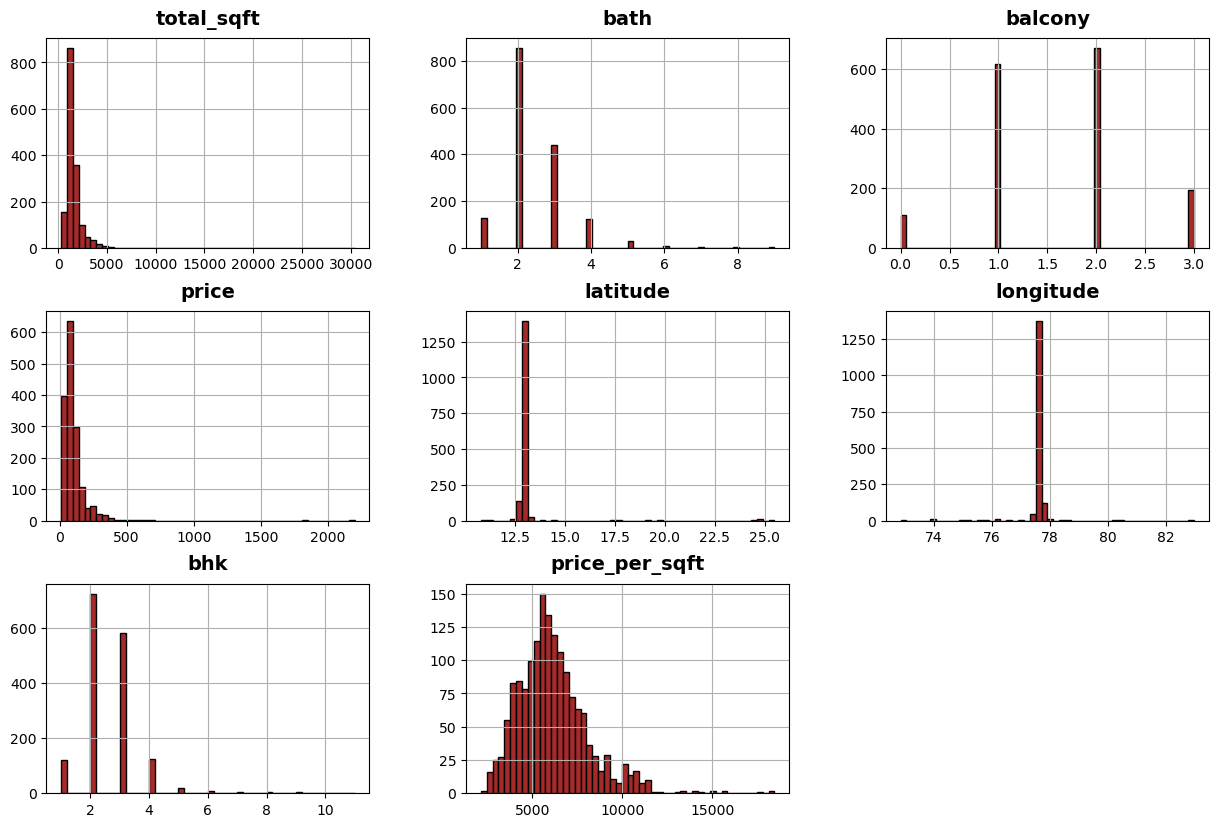

In [51]:
df_test_num.hist(figsize=(15, 10), bins=50, color="brown", edgecolor="black")

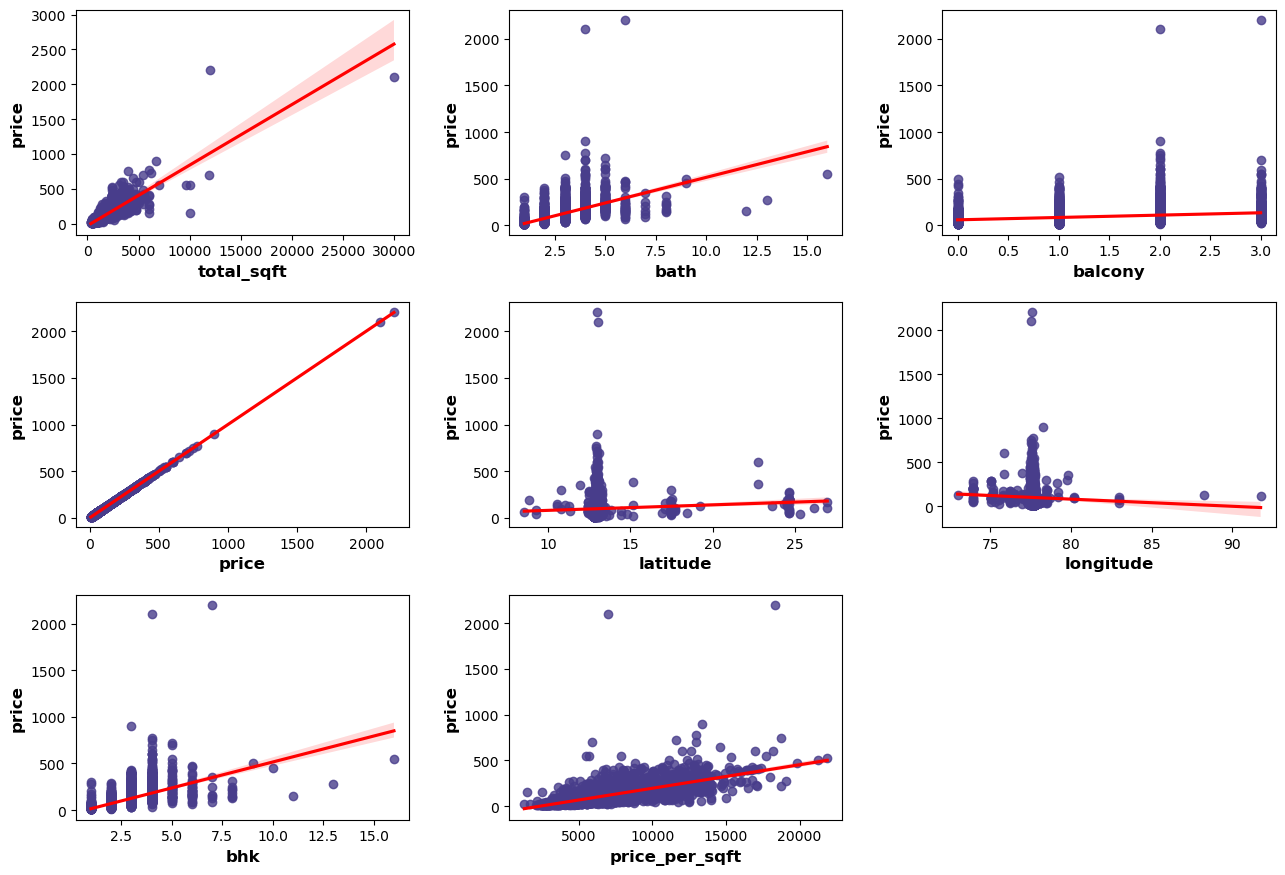

In [52]:
plt.figure(figsize=(15, 4.5))
plt.subplots_adjust(
    left=0.1,    
    bottom=0.1,
    right=0.9,
    top=1.9,
    wspace=0.3,
    hspace=0.3
)

for i, col in enumerate(df_train_num.columns):
    plt.subplot(3, 3, i+1)
    sns.regplot(
        x=col,
        y="price",
        data=df_train_num,
        scatter_kws={"color": "darkslateblue"},
        line_kws={"color": "red"}
    )

<AxesSubplot:>

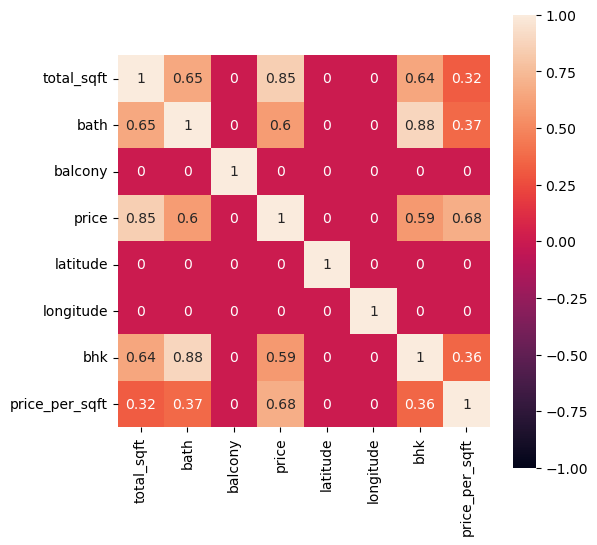

In [53]:
corr_matrix = df_train_num.corr(method = 'pearson')

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, vmax=1.0, vmin=-1.0, annot=True, square=True)

### Mutual Information

In [54]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X_, y):
    X = X_.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()

    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [55]:
mi_scores = make_mi_scores(df_train.drop("price", axis=1), df_train.price)

In [56]:
mi_scores

total_sqft        0.919515
price_per_sqft    0.902946
location          0.561779
bath              0.457274
bhk               0.451069
longitude         0.234210
latitude          0.230980
balcony           0.077451
availability      0.061803
area_type         0.060945
Name: MI Scores, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

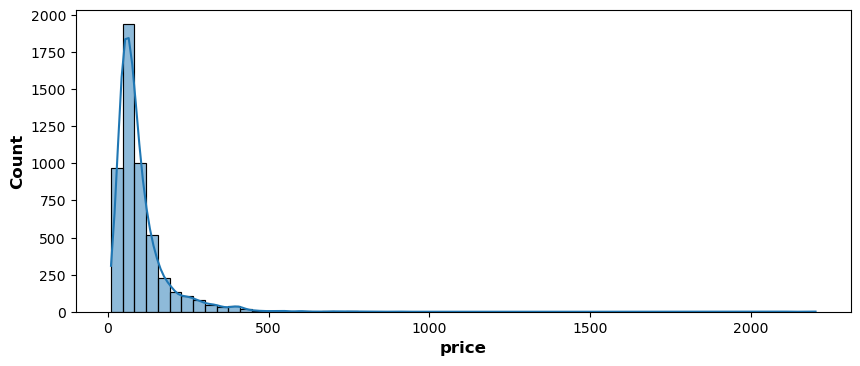

In [57]:
plt.figure(figsize=(10, 4))
sns.histplot(df_train.price, bins=60, kde=True)

<AxesSubplot:xlabel='MI Scores'>

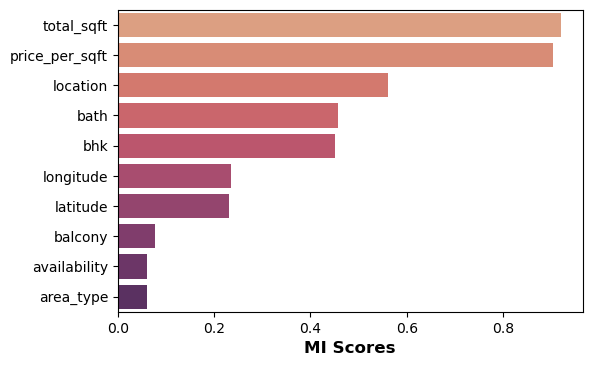

In [58]:
sns.barplot(x=mi_scores, y=mi_scores.index, palette="flare")

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

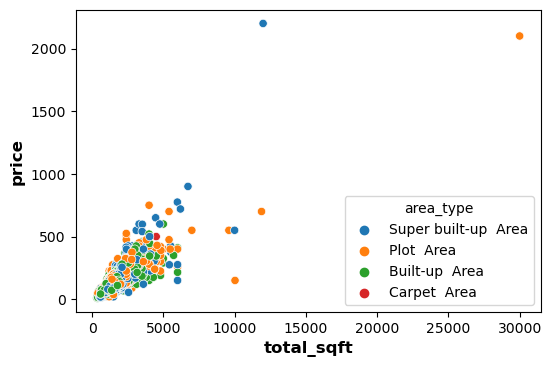

In [59]:
sns.scatterplot(x=df_train.total_sqft, y=df_train.price, hue=df_train.area_type)

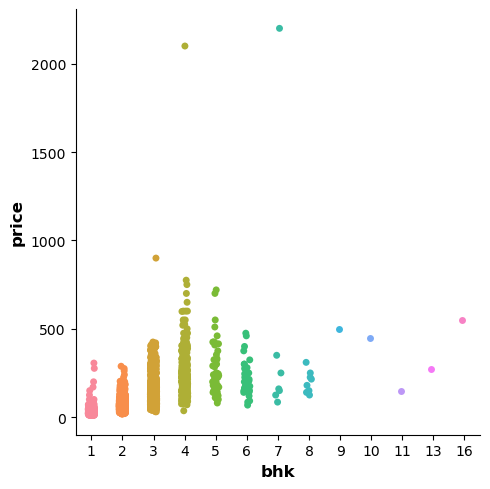

In [60]:
sns.catplot(x="bhk", y="price", data=df_train)

<AxesSubplot:xlabel='latitude', ylabel='Count'>

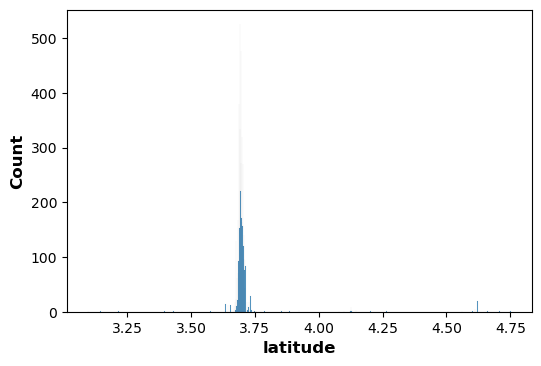

In [61]:
sns.histplot(np.log2(df_train.latitude))

In [62]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math

city_map = folium.Map(location=[12.967343041777564, 77.57805659519174], zoom_start=10)

# Add points to the map
mc = MarkerCluster()
for idx, row in df_train.iterrows():
    if not math.isnan(row['latitude']) and not math.isnan(row['longitude']):
        popup = """
        Location : <b>%s</b><br>
        Price : <b>₹%s lakh</b><br>
        """ % (row['location'], row['price'])
        mc.add_child(Marker([row['latitude'], row['longitude']], tooltip=popup))
city_map.add_child(mc)

# Display the map
city_map

In [63]:
df_train.to_csv("./Bangalore_house_prices/train.csv", index=False)
df_test.to_csv("./Bangalore_house_prices/test.csv", index=False)